<a href="https://colab.research.google.com/github/slmnysf/AnalisisFDI-DataMining/blob/main/Analisis_FDI_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [ ]:
df1 = pd.read_excel('https://github.com/slmnysf/file/blob/main/dataset_indonesia.xlsx?raw=true')
df1.head()

,Years,FDI,Export,Import,Population,GDP,GDP per capita,GDP growth
0,1981,133000000.0,2.379700e+10,2.154000e+10,150938232,8.551823e+10,566.577681,7.927157
1,1982,225000000.0,2.025100e+10,2.271600e+10,154468229,9.015845e+10,583.669858,2.246445
2,1983,292000000.0,1.923500e+10,2.203700e+10,158009246,8.105228e+10,512.959118,4.192967
3,1984,222000000.0,2.132400e+10,1.928600e+10,161523347,8.485370e+10,525.333963,6.975528
4,1985,310000000.0,1.937100e+10,1.784000e+10,164982451,8.528949e+10,516.960993,2.462144


1. FDI adalah Foreign Direct Investment yang didapat indonesia, menggunakan satuan nilai USD terkini 
2. Export adalah jumlah export barang dan jasa yang dilakukan indonesia dengan satuan nilai USD terkini 
3. Import adalah jumlah import barang dan jasa yang dilakukan indonesia dengan satuan nilai USD terkini 
4. Population adalah jumlah populasi penduduk indonesia
5. GDP adalah Gross Domestic Product yaitu nilai pasar semua barang dan jasa yang diproduksi oleh indonesia pada periode tertentu dengan satuan nilai USD terkini
6. GDP per capita adalah besarnya pendapatan rata-rata semua penduduk di indonesia dengan menggunakan satuan nilai USD terkini
7. GDP growth adalah pertumbuhan GDP di indonesia dengan menggunakan satuan nilai USD terkini

sumber : https://data.worldbank.org/

# Data Preprocessing

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Years           39 non-null     int64  
 1   FDI             39 non-null     float64
 2   Export          39 non-null     float64
 3   Import          39 non-null     float64
 4   Population      39 non-null     int64  
 5   GDP             39 non-null     float64
 6   GDP per capita  39 non-null     float64
 7   GDP growth      39 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 2.6 KB


In [ ]:
df1.columns

Index(['Years', 'FDI', 'Export', 'Import', 'Population', 'GDP',
       'GDP per capita', 'GDP growth'],
      dtype='object')

In [ ]:
df1.rename(columns={'GDP per capita':'gdp_capita', 'GDP growth':'growth'},inplace=True)

In [ ]:
df1['Years'] = pd.to_datetime(df1.Years, format= '%Y')
df1.sort_values('Years', inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Years       39 non-null     datetime64[ns]
 1   FDI         39 non-null     float64       
 2   Export      39 non-null     float64       
 3   Import      39 non-null     float64       
 4   Population  39 non-null     int64         
 5   GDP         39 non-null     float64       
 6   gdp_capita  39 non-null     float64       
 7   growth      39 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 2.7 KB


In [ ]:
df1.isna().any()

Years         False
FDI           False
Export        False
Import        False
Population    False
GDP           False
gdp_capita    False
growth        False
dtype: bool

In [ ]:
df1.duplicated().any()

False

In [ ]:
df1.corr()

,FDI,Export,Import,Population,GDP,gdp_capita,growth
FDI,1.000000,0.901748,0.928451,0.763897,0.916600,0.921873,0.146011
Export,0.901748,1.000000,0.992708,0.933742,0.974368,0.978447,0.055416
Import,0.928451,0.992708,1.000000,0.910437,0.981438,0.983933,0.074622
Population,0.763897,0.933742,0.910437,1.000000,0.894013,0.890080,-0.020458
GDP,0.916600,0.974368,0.981438,0.894013,1.000000,0.998448,0.102474
gdp_capita,0.921873,0.978447,0.983933,0.890080,0.998448,1.000000,0.122372
growth,0.146011,0.055416,0.074622,-0.020458,0.102474,0.122372,1.000000


# Visualisasi

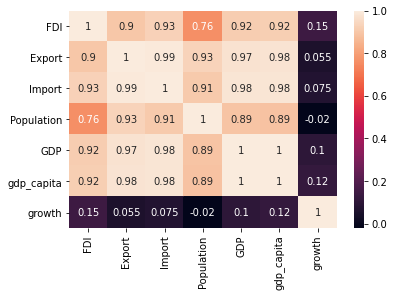

In [ ]:
sns.heatmap(df1.corr(),annot=True);

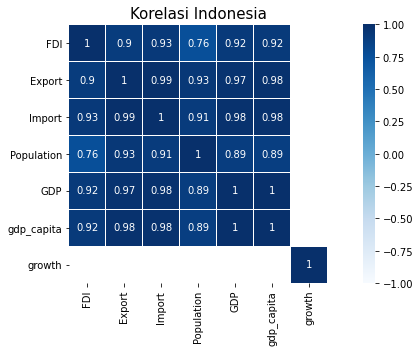

In [ ]:
plt.figure(figsize=(10,5))
corr = df1.corr()
sns.heatmap(corr[(corr > 0.5) | (corr <= -1)], 
            cmap='Blues', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)
plt.title('Korelasi Indonesia',fontsize=15)
plt.tight_layout();

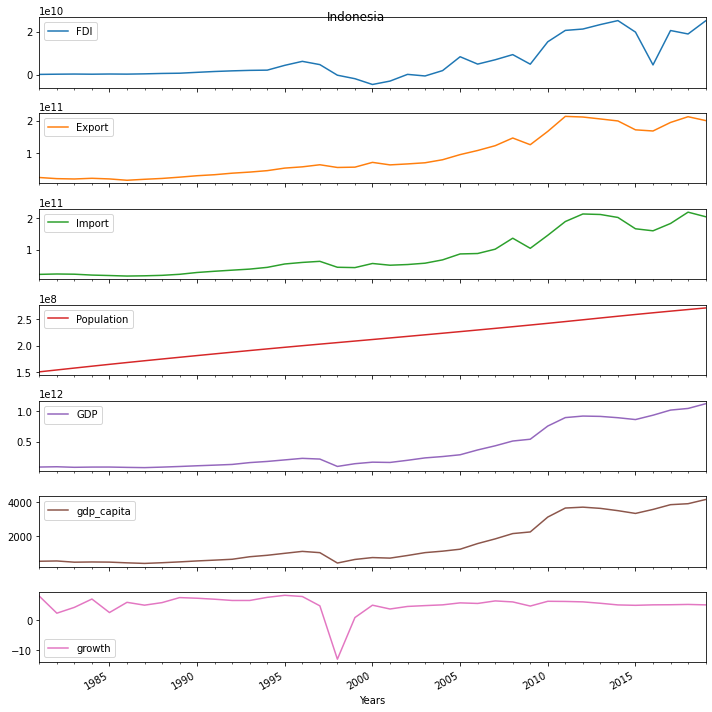

In [ ]:
df1.set_index('Years')[['FDI','Export','Import','Population','GDP','gdp_capita','growth']].plot(subplots=True, figsize=(10,10))
plt.suptitle('Indonesia')
plt.tight_layout();

# Regresi Linear

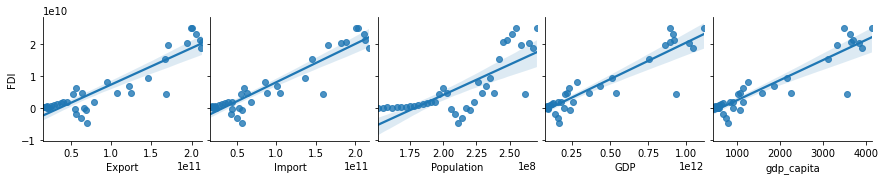

In [ ]:
sns.pairplot(df1,
             x_vars=['Export','Import','Population','GDP','gdp_capita'],
             y_vars='FDI',
             kind='reg');

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x = df1[['Export','Import','Population','GDP','gdp_capita']]
y = df1['FDI']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.predict(x_test)

array([ 2.04115497e+10,  1.52615207e+10, -1.60467997e+08,  2.74235656e+09,
        1.60027131e+10,  4.66397615e+09, -9.85305218e+08,  1.05986864e+10,
        4.11517712e+09,  5.59925002e+09])

In [ ]:
lm.score(x_test,y_test)

0.8651326538763676

In [ ]:
lm.predict([[20251000000,19286000000,178209150,81052283404.6079,631.782837284761]])

array([1.36906717e+09])

# Forecasting Prophet

In [ ]:
!pip install fbprophet

In [ ]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
df = df1[['Years','FDI']]
df.head()

,Years,FDI
0,1981-01-01,133000000.0
1,1982-01-01,225000000.0
2,1983-01-01,292000000.0
3,1984-01-01,222000000.0
4,1985-01-01,310000000.0


In [ ]:
df['Years'] = pd.to_datetime(df.Years, format= '%Y')
df.sort_values('Years', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
analisis = df[['Years','FDI']].rename(
    columns={'Years':'ds',
            'FDI':'y'})
analisis.head()

,ds,y
0,1981-01-01,133000000.0
1,1982-01-01,225000000.0
2,1983-01-01,292000000.0
3,1984-01-01,222000000.0
4,1985-01-01,310000000.0


In [ ]:
analisis['ds'] = pd.to_datetime(analisis.ds, format= '%Y')
analisis.sort_values('ds', inplace=True)

In [ ]:
from fbprophet import Prophet
analisis.columns = ['ds', 'y']
analisis['ds']= pd.to_datetime(analisis['ds'])
model = Prophet()
model.fit(analisis)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


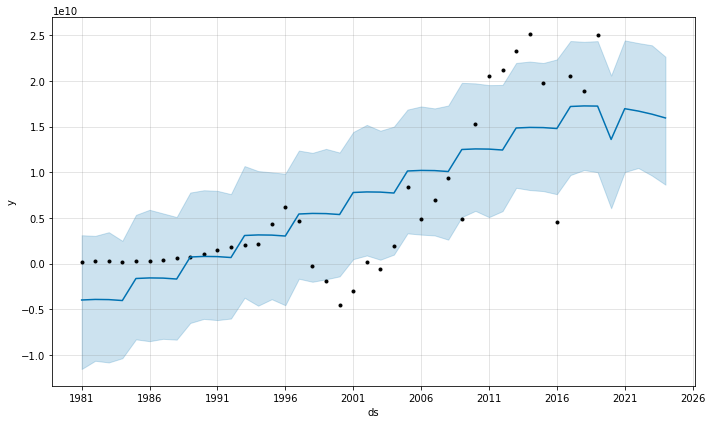

In [ ]:
# forecasting
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# visualize
fig = model.plot(forecast)